In [57]:
import pandas as pd

# Assuming the dataset is in CSV format
df = pd.read_csv('/Users/workstuff/Coding_and_AI/AI projects/01_Student_Performance/student+performance/student/student-mat.csv')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df.head()



,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [58]:
# Display the first few rows of the data
print(df.head())

# Display a concise summary of the DataFrame
print(df.info())

# Get a statistical summary of the numeric columns
print(df.describe())

# Count of unique values in each column to understand the distribution
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")


  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                            

In [59]:
# Check for missing values in the dataset
print(df.isnull().sum())


school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64


In [60]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    object
dtype: object


In [61]:
df = pd.read_csv('/Users/workstuff/Coding_and_AI/AI projects/01_Student_Performance/student+performance/student/student-mat.csv', delimiter=';')


In [62]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns.dtypes)


age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object


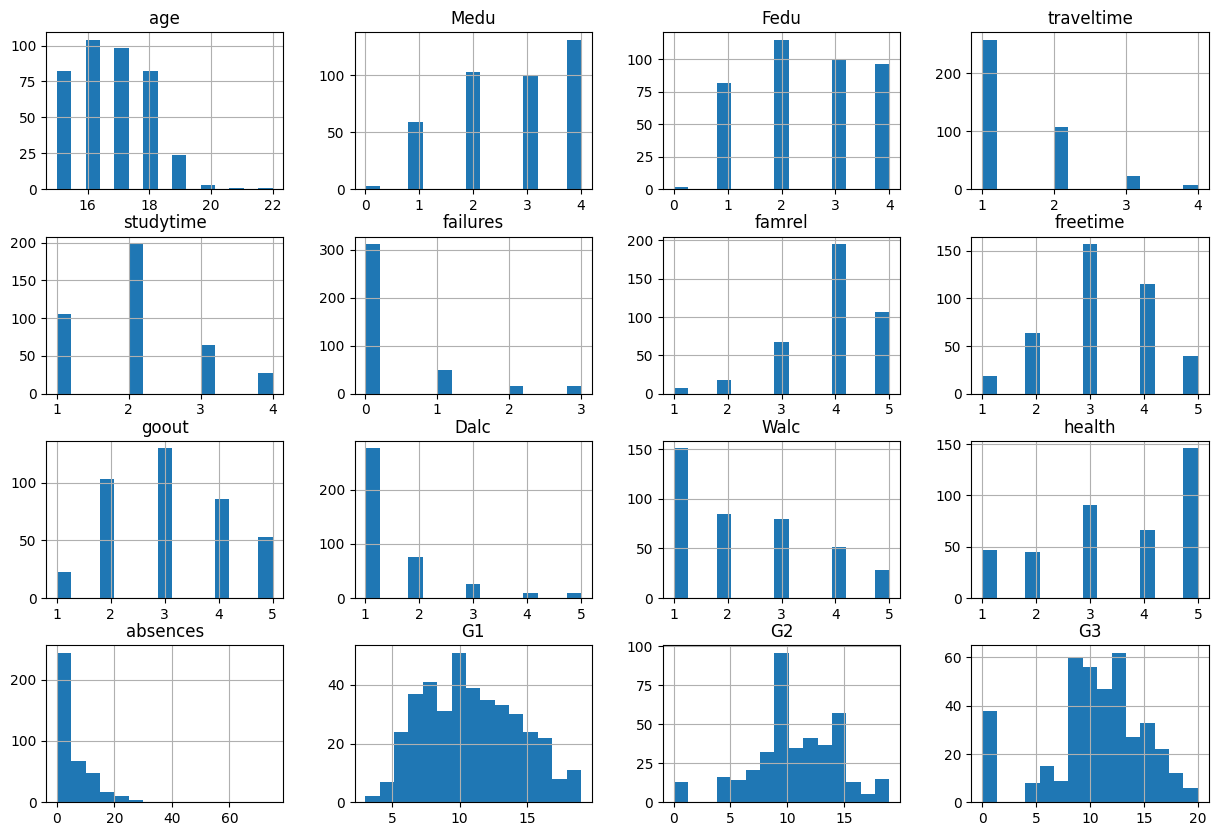

In [63]:
import matplotlib.pyplot as plt

# Select only the numeric columns for histogram
numeric_columns = df.select_dtypes(include=['number'])

# Generate histograms for all numeric columns
numeric_columns.hist(bins=15, figsize=(15, 10))
plt.show()


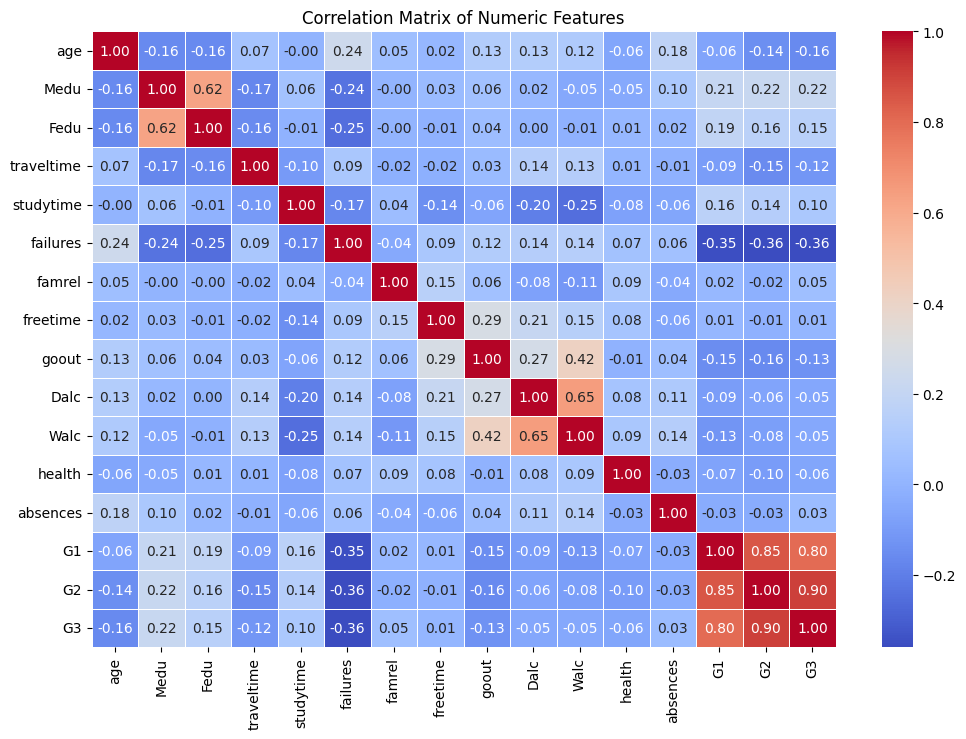

In [64]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


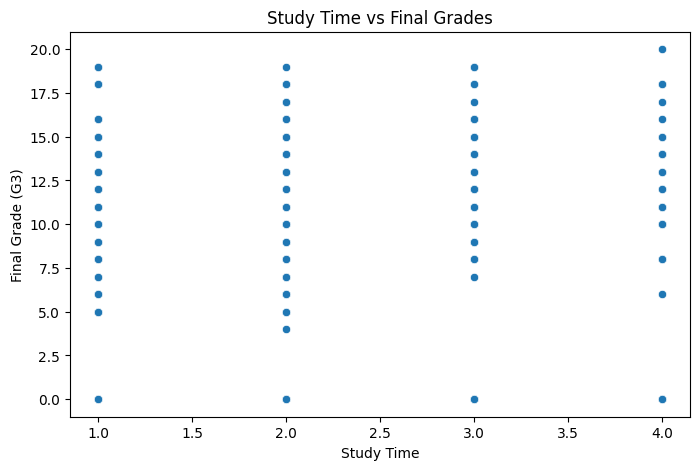

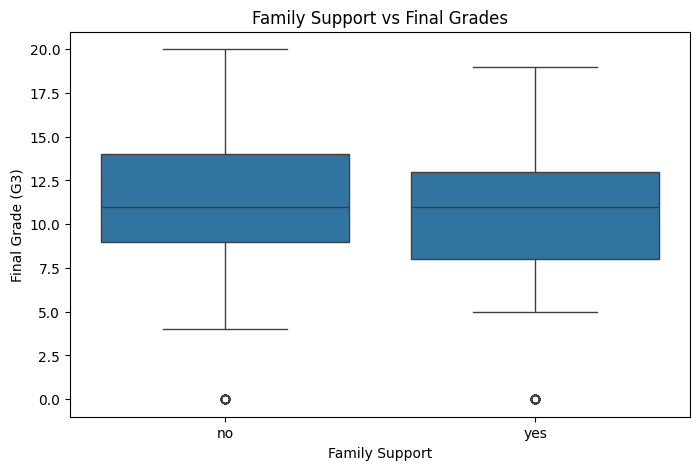

In [65]:
# Scatter plot of study time vs final grades
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grades')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# Box plot of final grades by family support
plt.figure(figsize=(8, 5))
sns.boxplot(x='famsup', y='G3', data=df)
plt.title('Family Support vs Final Grades')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Select features and target
X = df.drop('G3', axis=1)  # Drop the target column to isolate features
y = df['G3']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)


In [68]:
# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 5.0323941088667405
R-squared: 0.75457778550435


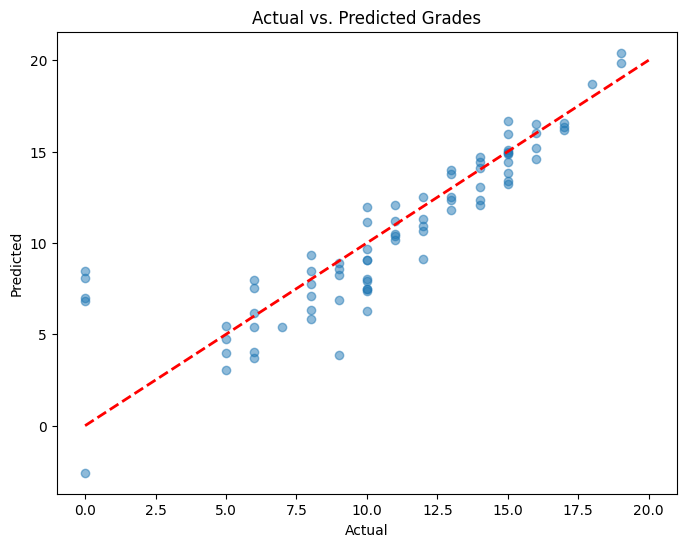

In [69]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Ideal line where actual = predicted
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Grades')
plt.show()

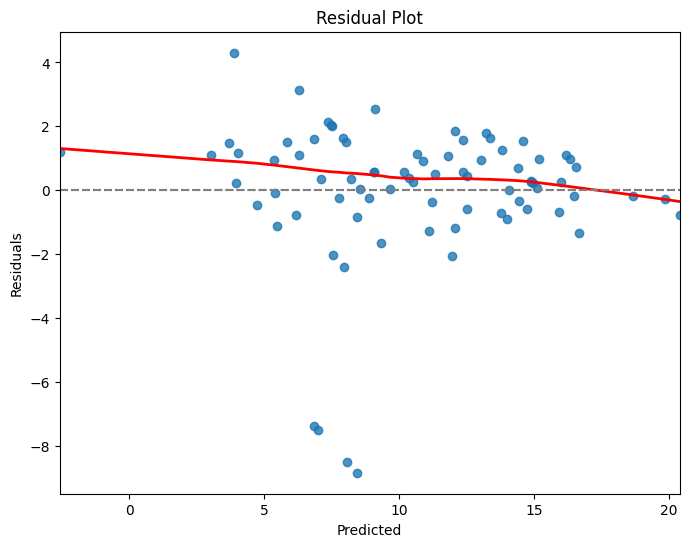

In [70]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

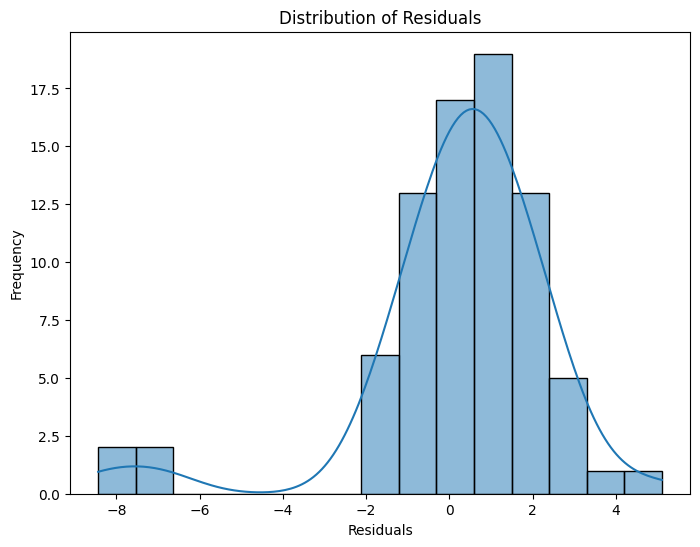

In [71]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [72]:
from sklearn.model_selection import cross_val_score

# Assuming your model and data are already prepared as 'model', 'X', and 'y'
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation results
print("Cross-validated R-squared scores:", scores)
print("Average R-squared:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validated R-squared scores: [0.8104552  0.8841491  0.78499095 0.78426161 0.70122055]
Average R-squared: 0.7930154807697392
Standard deviation: 0.05861196769812018


In [73]:
df['parent_education'] = df['Medu'] + df['Fedu']


In [74]:
df['parent_education'] = df['Medu'] + df['Fedu']


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare your features and target variable
X = df.drop('G3', axis=1)  # make sure to include new features
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.0323941088667405
R-squared: 0.75457778550435


In [76]:
# Make sure new features are included
print(X.columns)  # Check if 'parent_education' and 'failures_squared' are listed

# If not included, update X definition
X = df.drop('G3', axis=1)  # Ensure this line is after the new features are created


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'parent_education'],
      dtype='object')


In [77]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Assuming 'X' and 'y' are already defined as:
# X = df.drop('G3', axis=1)  # all columns except the target
# y = df['G3']  # target column


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [81]:
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 3.4977784810126575
Random Forest R-squared: 0.8294186579876849


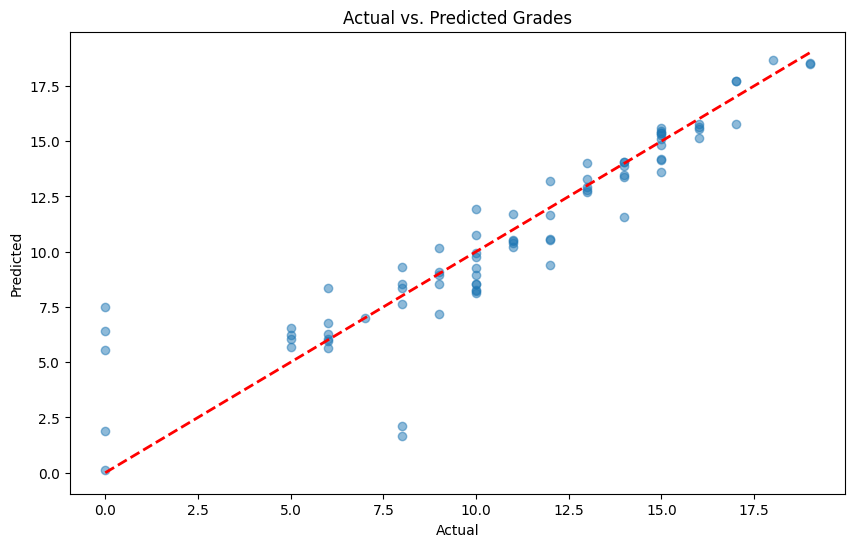

In [82]:
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Grades')
plt.show()


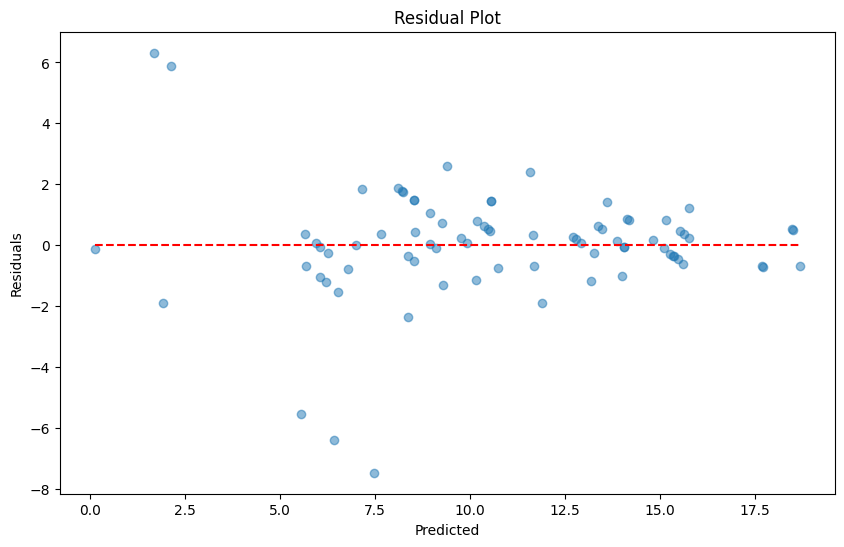

In [83]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

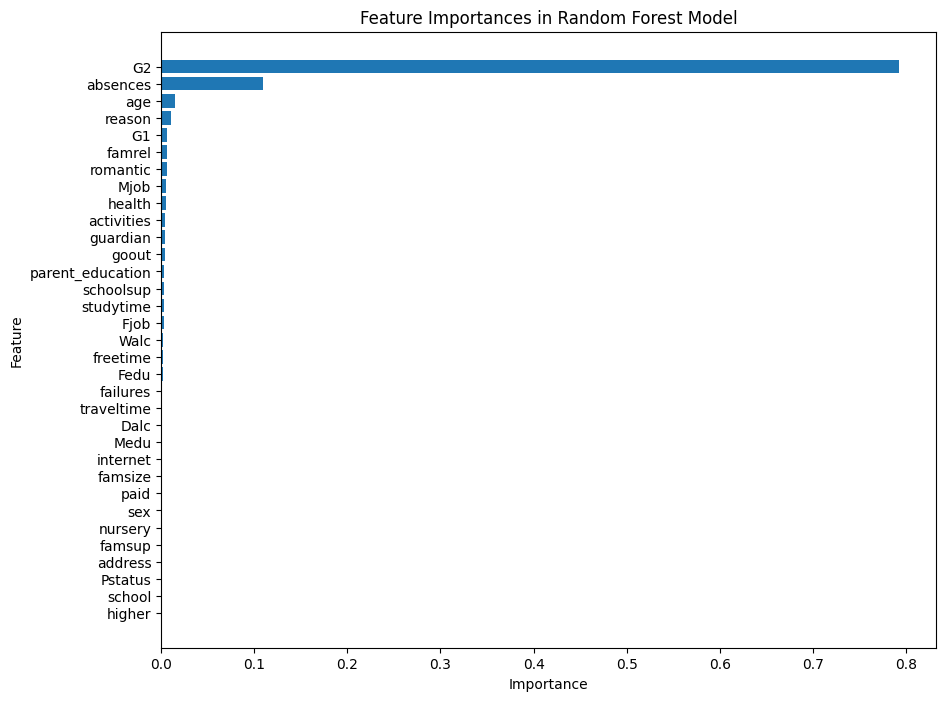

In [84]:
feature_importances = random_forest_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 8))
sorted_idx = np.argsort(feature_importances)
plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()


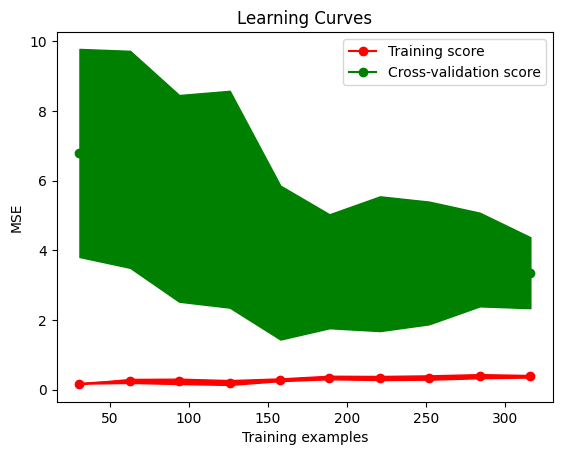

In [85]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color='r')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color='g')

plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.title('Learning Curves')
plt.show()


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  2.1463045411276642


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model with the best parameters
optimized_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model
optimized_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_opt = optimized_rf.predict(X_test)

# Calculate metrics
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)

print("Optimized Random Forest Mean Squared Error:", mse_opt)
print("Optimized Random Forest R-squared:", r2_opt)

Optimized Random Forest Mean Squared Error: 3.4902343673294425
Optimized Random Forest R-squared: 0.8297865729495276


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [89]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [90]:
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [91]:
# Predicting the test set results
y_pred_gb = gb_model.predict(X_test)

# Calculating the performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R-squared:", r2_gb)


Gradient Boosting Mean Squared Error: 3.425808107809502
Gradient Boosting R-squared: 0.8329285437373871


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score found:  2.2791973840405197


In [93]:
optimized_gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=42)
optimized_gb.fit(X_train, y_train)
y_pred_opt_gb = optimized_gb.predict(X_test)
mse_opt_gb = mean_squared_error(y_test, y_pred_opt_gb)
r2_opt_gb = r2_score(y_test, y_pred_opt_gb)

print("Optimized Gradient Boosting Mean Squared Error:", mse_opt_gb)
print("Optimized Gradient Boosting R-squared:", r2_opt_gb)


Optimized Gradient Boosting Mean Squared Error: 3.3536445012180938
Optimized Gradient Boosting R-squared: 0.8364478531858366


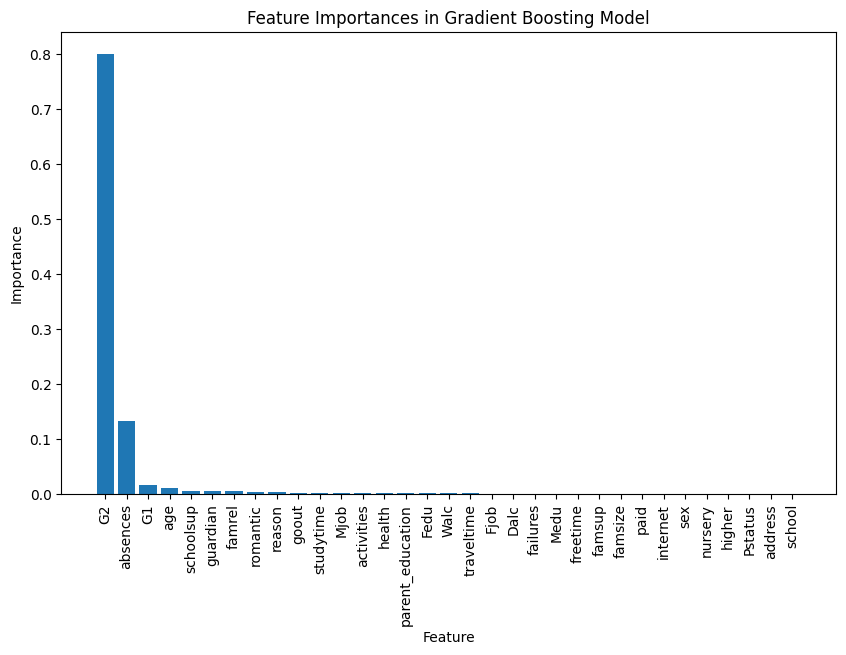

In [94]:
feature_importances_gb = optimized_gb.feature_importances_
indices = np.argsort(feature_importances_gb)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Gradient Boosting Model')
plt.bar(range(X_train.shape[1]), feature_importances_gb[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimized_gb, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)
print("Average R-squared:", np.mean(scores))


Cross-validated R-squared scores: [0.75734807 0.83204174 0.87047487 0.84394482 0.82260421]
Average R-squared: 0.825282741469727


In [96]:
# Calculate residuals
residuals = y_test - y_pred_opt_gb

# Create a DataFrame for analysis
results_df = X_test.copy()
results_df['actual'] = y_test
results_df['predicted'] = y_pred_opt_gb
results_df['residual'] = residuals

# Investigate high residual cases
high_residuals = results_df[results_df['residual'].abs() > np.percentile(results_df['residual'].abs(), 90)] # top 10% errors


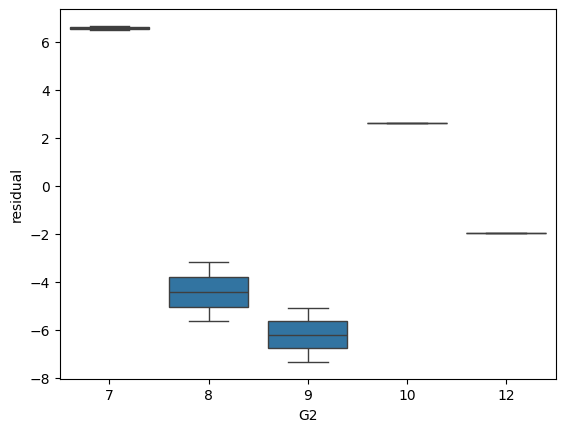

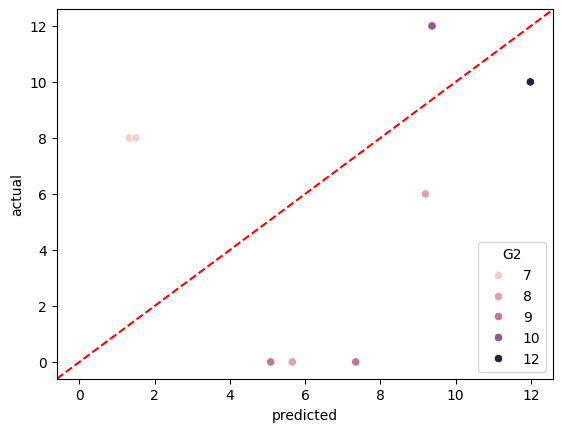

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare distributions of features within high error segments
sns.boxplot(x='G2', y='residual', data=high_residuals)
plt.show()

sns.scatterplot(x='predicted', y='actual', hue='G2', data=high_residuals)
plt.axline((0, 0), slope=1, color="red", linestyle="--") # adds a reference line for perfect predictions
plt.show()

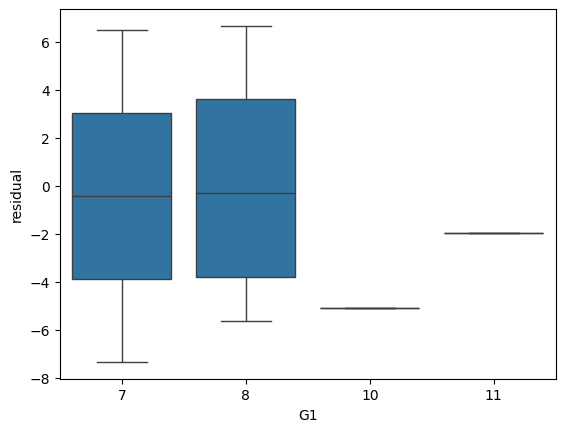

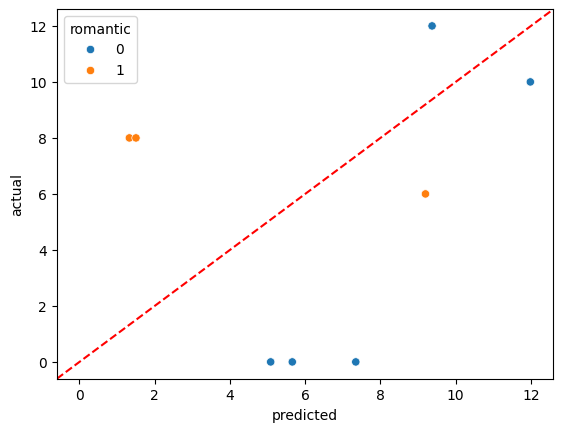

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare distributions of features within high error segments
sns.boxplot(x='G1', y='residual', data=high_residuals)
plt.show()

sns.scatterplot(x='predicted', y='actual', hue='romantic', data=high_residuals)
plt.axline((0, 0), slope=1, color="red", linestyle="--") # adds a reference line for perfect predictions
plt.show()

In [99]:
!pip install tensorflow

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Specify input shape explicitly here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# The rest of your model compilation and training code remains the same

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
mse_nn, _ = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Neural Network Mean Squared Error:", mse_nn)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 126.2355 - mean_squared_error: 126.2355 - val_loss: 101.6245 - val_mean_squared_error: 101.6245
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.0076 - mean_squared_error: 91.0076 - val_loss: 75.4657 - val_mean_squared_error: 75.4657
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.8839 - mean_squared_error: 77.8839 - val_loss: 50.5509 - val_mean_squared_error: 50.5509
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.7271 - mean_squared_error: 50.7271 - val_loss: 30.0545 - val_mean_squared_error: 30.0545
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.7206 - mean_squared_error: 27.7206 - val_loss: 16.9841 - val_mean_squared_error: 16.9841
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9299 - mean_squared_error: 16.9299 - val_loss: 11.4353 - val_mean_squared_error: 11.4353
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3254 - mean_squared_error: 14.3254 - val_loss: 1

In [117]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network configurations
neuron_configs = [50, 100, 150]
dropout_rates = [0.1, 0.2, 0.3]
results = []

for neurons in neuron_configs:
    for dropout in dropout_rates:
        model = Sequential([
            Input(shape=(X_train_scaled.shape[1],)),  # Define the input shape explicitly here
            Dense(neurons, activation='relu'),
            Dropout(dropout),
            Dense(neurons, activation='relu'),
            Dropout(dropout),
            Dense(1, activation='linear')
        ])

        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

        # Train the model silently
        history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

        # Evaluate the model
        mse = model.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Get the MSE from the evaluation
        results.append((neurons, dropout, mse))

# Identifying the best configuration
best_config = min(results, key=lambda x: x[2])
print(f'Best configuration: Neurons = {best_config[0]}, Dropout = {best_config[1]}, MSE = {best_config[2]}')


Best configuration: Neurons = 50, Dropout = 0.3, MSE = 6.29835319519043


In [118]:
# Example adjustments:
from tensorflow.keras.optimizers import Adam

# Define the model building in a function to ensure clean setup each time
def build_model(input_shape, neurons, dropout):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(neurons, activation='relu'),
        Dropout(dropout),
        Dense(neurons, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Create models with different configurations outside of the training loop
configs = [(neurons, dropout) for neurons in [50, 100, 150] for dropout in [0.1, 0.2, 0.3]]
models = {config: build_model(X_train_scaled.shape[1], *config) for config in configs}

# Now train and evaluate each model
results = []
for config, model in models.items():
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
    mse = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    results.append((config[0], config[1], mse))

best_config = min(results, key=lambda x: x[2])
print(f'Best configuration: Neurons = {best_config[0]}, Dropout = {best_config[1]}, MSE = {best_config[2]}')


Best configuration: Neurons = 50, Dropout = 0.3, MSE = 5.994216442108154


In [119]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(input_shape, neurons, dropout, l2_reg):
    model = Sequential([
        Dense(neurons, input_shape=(input_shape,), kernel_regularizer=l2(l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(neurons, kernel_regularizer=l2(l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Assuming X_train_scaled and y_train are predefined
model = build_model(X_train_scaled.shape[1], 50, 0.3, 0.01)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("MSE:", mse)


Epoch 1/100


/Users/workstuff/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 135.4381 - mean_squared_error: 134.5400 - val_loss: 127.9135 - val_mean_squared_error: 127.0148
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.7794 - mean_squared_error: 123.8806 - val_loss: 125.6181 - val_mean_squared_error: 124.7192
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123.2447 - mean_squared_error: 122.3458 - val_loss: 121.9412 - val_mean_squared_error: 121.0423
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.6353 - mean_squared_error: 107.7364 - val_loss: 117.6754 - val_mean_squared_error: 116.7765
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.6315 - mean_squared_error: 112.7326 - val_loss: 112.8527 - val_mean_squared_error: 111.9538
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.4771 - mean_squared_error: 116.5783 - val_loss: 108.0105 - val_mean_squared_error: 107.1119
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.2690 - mean_squared

In [120]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(input_shape, neurons, dropout, l1_reg, l2_reg):
    model = Sequential([
        Dense(neurons, input_shape=(input_shape,), kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(neurons, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Assuming X_train_scaled and y_train are predefined
model = build_model(X_train_scaled.shape[1], 50, 0.3, 0.001, 0.01)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("MSE:", mse)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 130.5926 - mean_squared_error: 129.1634 - val_loss: 138.2515 - val_mean_squared_error: 136.8237
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.4480 - mean_squared_error: 128.0206 - val_loss: 135.3609 - val_mean_squared_error: 133.9349
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.1070 - mean_squared_error: 120.6814 - val_loss: 132.6502 - val_mean_squared_error: 131.2259
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.4401 - mean_squared_error: 123.0161 - val_loss: 130.0957 - val_mean_squared_error: 128.6728
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 114.0227 - mean_squared_error: 112.6002 - val_loss: 128.0716 - val_mean_squared_error: 126.6501
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.8587 - mean_squared_error: 112.4376 - val_loss: 125.7797 - val_mean_squared_error: 124.3598
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.0527 - mean_squared_

In [121]:
def build_model(input_shape, neurons, dropout, l1_reg, l2_reg, learning_rate):
    model = Sequential([
        Dense(neurons, input_shape=(input_shape,), kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(neurons, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Adjust these parameters based on the above suggestions
neurons = 100  # Increased from 50
dropout = 0.4  # Increased from 0.3
learning_rate = 0.0005  # Decreased from 0.001
epochs = 200  # Increased from 150
batch_size = 20  # Decreased from 32

model = build_model(X_train_scaled.shape[1], neurons, dropout, 0.001, 0.01, learning_rate)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stop])

mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Optimized MSE:", mse)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 135.1382 - mean_squared_error: 132.4139 - val_loss: 129.4822 - val_mean_squared_error: 126.7589
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.1470 - mean_squared_error: 124.4241 - val_loss: 128.8330 - val_mean_squared_error: 126.1111
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.4406 - mean_squared_error: 123.7190 - val_loss: 127.6132 - val_mean_squared_error: 124.8925
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.6375 - mean_squared_error: 129.9170 - val_loss: 125.8905 - val_mean_squared_error: 123.1710
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.5614 - mean_squared_error: 109.8422 - val_loss: 124.0749 - val_mean_squared_error: 121.3568
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.7047 - mean_squared_error: 103.9868 - val_loss: 121.5226 - val_mean_squared_error: 118.8055
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.5651 - 

In [122]:
def build_simplified_model(input_shape, neurons, dropout, learning_rate):
    model = Sequential([
        Dense(neurons, input_shape=(input_shape,), activation='relu'),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Reduced complexity and adjusted hyperparameters
neurons = 30
dropout = 0.2
learning_rate = 0.01  # Trying a slightly higher learning rate for quicker convergence
epochs = 100
batch_size = 16

model = build_simplified_model(X_train_scaled.shape[1], neurons, dropout, learning_rate)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stop])

mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Simplified Model MSE:", mse)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 99.9923 - mean_squared_error: 99.9923 - val_loss: 57.1750 - val_mean_squared_error: 57.1750
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.8018 - mean_squared_error: 40.8018 - val_loss: 15.4549 - val_mean_squared_error: 15.4549
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.0309 - mean_squared_error: 12.0309 - val_loss: 8.9083 - val_mean_squared_error: 8.9083
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0294 - mean_squared_error: 10.0294 - val_loss: 7.8951 - val_mean_squared_error: 7.8951
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2678 - mean_squared_error: 8.2678 - val_loss: 6.6889 - val_mean_squared_error: 6.6889
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8829 - mean_squared_error: 6.8829 - val_loss: 6.2212 - val_mean_squared_error: 6.2212
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6789 - mean_squared_error: 6.6789 - val_loss

In [123]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [124]:
import numpy as np
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(50, activation='relu'),
        Dropout(0.3),
        Dense(50, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Wrap Keras model using KerasRegressor from SciKeras
model = KerasRegressor(model=build_model, epochs=50, batch_size=10, verbose=0)

# Perform cross-validation
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate MSE
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))


MSE scores for each fold: [6.40814192 4.48871034 4.85586987 7.07583853 4.25076089]
Mean MSE: 5.415864310019556
Standard Deviation of MSE: 1.1198931651893935


In [126]:
# Train the model silently (make sure this completes successfully)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)

# Quick check to see if the model is predicting after fitting
try:
    initial_pred = model.predict(X_train_scaled[:5])  # Change [:5] as needed for your data size
    print("Initial prediction after fitting:", initial_pred)
except Exception as e:
    print("Error in making an initial prediction:", e)

# If the above step is successful, proceed to call your permutation importance function
importances = permutation_importance(model, X_train_scaled, y_train)
importances = sorted(importances, key=lambda x: x['importance'], reverse=True)
for importance in importances:
    print(f"Feature {importance['feature']} Importance: {importance['importance']}")


Initial prediction after fitting: [10.925886  13.08371    1.5575095  7.9549656  8.47123  ]


TypeError: string indices must be integers, not 'str'

In [127]:
# Assuming `X_train_scaled` and `X_test_scaled` are your feature matrices
# Drop the most negatively impactful features, example: Feature 31 and Feature 30
X_train_reduced = np.delete(X_train_scaled, [31, 30], axis=1)
X_test_reduced = np.delete(X_test_scaled, [31, 30], axis=1)

# Rebuild and retrain the model with reduced features
model = Sequential([
    Input(shape=(X_train_reduced.shape[1],)),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reduced, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the new model
mse = model.evaluate(X_test_reduced, y_test, verbose=0)
print("New MSE with reduced features:", mse)


New MSE with reduced features: 17.177165985107422
